# The PAMAP2 Physical Activity Monitoring Report

###### Data Science Research Methods Project 2  |   Candidate number: 244788


Outcome of the report:

Develop hardware and/or software which can determine:

- the **amount** of exercise using start/end times and heartrates;
- the **type** of exercise

In order to develop this, it is neccessary to do the following:

### Table of contents

**1. [Data extraction](#dataextraction)**
- 1.1 PAMAP2 Physical Activity Monitoring dataset 
- 1.2 Uploading data files
- 1.3 Merging the files
- 1.4 Importing extra files

**2. [Pre-processing the data](#preprop)**
- 2.1 Cleaning columns
- 2.2 Removing and filtering data

**3. [Dev and Test set](#devtest)**
- 3.1 Splitting into Dev and Test sets

**4. [Exploratory Data Analysis](#explore)**
- 4.1 Averages
- 4.2 Correlations
- 4.3 Exploring Heartrate
- 4.4 Exploring Temperature
- 4.5 Exploring Moving and Non-Moving Activities
- 4.6 Subject Exploration

**5. [Hypothesis Testing](#hypo)**
- 5.1 Our first testable hypothesis
- 5.2 Our second testable hypothesis
- 5.3 Our third testable hypothesis

**6. [Modeling Introduction](#model)**
- 6.1 Scaling the data 
- 6.2 Random Forrest Calssifier
- 6.3 Logistic Regression

**7. [Dimensionality Reduction and Principal Componant Analysis](#pca)**

**8. [K Means Clustering](#kmeans)**
- 8.1 How many clusters should we use?
- 8.2 Evaluating Silhuoette and ARI score
- 8.3 Evaluating the clusters

**9. [Summary](#summary)**

**10. [References](#ref)**

---



***


## Part 1: Data Extraction <a class="anchor" id="dataextraction"></a>

### 1.1 PAMAP2 Physical Activity Monitoring dataset 

For this report, I will be using data from the *PAMAP2 Physical Activity Monitoring Data Set* [[1](#1)]. This data set recorded 9 subjects wearing 3 inertial measurements units and a heartrate monitor. The subjects performed 18 different physical activities (walking, cycling, rope jumping, etc.). There are two sets of data, optional and protocol. All of the subjects undertook the protocol activities whereas only a few completed a few of the optional.

### 1.2 Uploading data files

As the data was in either `.dat` format, with no headers, a header list was needed before uploading the files. The headers that needed to be removed were numbers for ease later on. A data frame was created for each subject, all had *protocol* data frame and five subjects also took part in the *optional*.

Each of the data-files contains 54 columns per row, the columns contain the following data:

- 1 timestamp (s)
- 2 activityID
- 3 heart rate (bpm)
- 4-20 IMU hand
- 21-37 IMU chest
- 38-54 IMU ankle

The IMU sensory data contains the following columns:

- 1 temperature (°C)
- 2-4 3D-acceleration data (ms-2), scale: ±16g, resolution: 13-bit
- 5-7 3D-acceleration data (ms-2), scale: ±6g, resolution: 13-bit* *(to be removed)*
- 8-10 3D-gyroscope data (rad/s)
- 11-13 3D-magnetometer data (μT)
- 14-17 orientation (invalid in this data collection) *(to be removed)*


<div class="alert alert-block alert-info">
<b>Please note</b> the units of the columns for future reference
</div>


In [1]:
#standard imports for when working with pandas
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
import random
from numpy.random import RandomState
import sklearn
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
%matplotlib inline


#setting headers for the dat files
a= ['timestamp', 
    'activityID',
    'heartrate_bpm',
    'imu_hand_temp',
    'imu_hand_3d_acceleration_1',
          'imu_hand_3d_acceleration_2', 
          'imu_hand_3d_acceleration_3',
    #the numbers are columns that will be removed
    #this is stated in the readme.pdf
    '5',
    '6',
    '7',
          'imu_hand_3d_gyroscope_1',
          'imu_hand_3d_gyroscope_2', 
          'imu_hand_3d_gyroscope_3', 
          'imu_hand_3d_magnetometer_1',
          'imu_hand_3d_magnetometer_2',
          'imu_hand_3d_magnetometer_3',
    '14',
    '15',
    '16',
    '17',
          'imu_chest_temp', 
          'imu_chest_3d_acceleration_1',
          'imu_chest_3d_acceleration_2',
          'imu_chest_3d_acceleration_3',
    '5b',
    '6b',
    '7b',
          'imu_chest_3d_gyroscope_1',
          'imu_chest_3d_gyroscope_2',
          'imu_chest_3d_gyroscope_3',
          'imu_chest_3d_magnetometer_1',
          'imu_chest_3d_magnetometer_2',
          'imu_chest_3d_magnetometer_3',
    '14b',
    '15b',
    '16b',
    '17b',

          'imu_ankle_temp',
          'imu_ankle_3d_acceleration_1',
          'imu_ankle_3d_acceleration_2',
          'imu_ankle_3d_acceleration_3',
    '5c',
    '6c',
    '7c',
          'imu_ankle_3d_gyroscope_1',
          'imu_ankle_3d_gyroscope_2',
          'imu_ankle_3d_gyroscope_3', 
          'imu_ankle_3d_magnetometer_1',
          'imu_ankle_3d_magnetometer_2',
          'imu_ankle_3d_magnetometer_3',
    '14c',
    '15c',
    '16c',
    '17c']

activityIDkey = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }

#protocol files
df101p = pd.read_table('101_p.dat', sep=' ', names=a)
df102p = pd.read_table('102_p.dat', sep=' ', names=a)
df103p = pd.read_table('103_p.dat', sep=' ', names=a)
df104p = pd.read_table('104_p.dat', sep=' ', names=a)
df105p = pd.read_table('105_p.dat', sep=' ', names=a)
df106p = pd.read_table('106_p.dat', sep=' ', names=a)
df107p = pd.read_table('107_p.dat', sep=' ', names=a)
df108p = pd.read_table('108_p.dat', sep=' ', names=a)
df109p = pd.read_table('109_p.dat', sep=' ', names=a)

#optional files
df101o = pd.read_table('101_o.dat', sep=' ', names=a)
df105o = pd.read_table('105_o.dat', sep=' ', names=a)
df106o = pd.read_table('106_o.dat', sep=' ', names=a)
df108o = pd.read_table('108_o.dat', sep=' ', names=a)
df109o = pd.read_table('109_o.dat', sep=' ', names=a)



### 1.3 Merging the data files

As these files were stored separately, data merging is a necessary step. All the files have the same header values so it was a matter of combining the sets. As each data file is from separate subjects, a subject header was added. This process will be useful when analysing trends within the whole data set.

In [2]:
#Creating a list of the data frames

mylist = [df101p,df102p,df103p,df104p,df105p,df106p,df107p,df108p,df109p,df101o,df105o,df106o,df108o,df109o]

#list of subjects
subject_names = ['101p','102p','103p','104p','105p','106p','107p','108p','109p','101o','105o','106o','106o','109o']
subjects = []

#adding a subject column to the dat files
x=0
for w in mylist:
    w['subject']=subject_names[x]
    x+=1
    subjects.append(w)
    
#adding to the data frame    
df = pd.concat(subjects)

#checking the column has been added
df.shape

(3850505, 55)

### 1.4 Importing other files

There were 2 other files which may be needed for further analysis. They were converted into `csv` format and then uploaded. For the `Subject_Information.csv` a column for BMI may be needed further down the line, so was added using the BMI equation:

$$BMI = \frac{kg}{m^2}$$


In [3]:
subjectinfo = 'Subject_Information.csv'
#subject info df
sidf = pd.read_csv(subjectinfo,index_col=None)
#inserting BMI column
sidf.insert(5, column='BMI', value=sidf['Weight (kg)']/((sidf['Height (cm)']/100)**2))


#activities df
actdf = pd.read_csv('PerformedActivitiesSummaries.csv',index_col=None)

***
## Part 2: Pre-processing the data <a class="anchor" id="preprop"></a>


### 2.1 Cleaning columns

As stated in the `readme.pdf`, columns 5-7 were 'not precisely calibrated by the first one. Moreover, due to high impacts caused by certain movements with acceleration over 6g, it gets saturated sometimes. Therefore, the use of the data from the first accelerometer (with the scale of 16g is recommended.'. Columns 14-17 (orientation) is also invalid in this data collection and should be removed for the analysis.




In [4]:
#removing the uneccessary columns

titles = ['subject',
          'timestamp', 
          'activityID',
          'heartrate_bpm',
          'imu_hand_temp',
          'imu_hand_3d_acceleration_1',
          'imu_hand_3d_acceleration_2', 
          'imu_hand_3d_acceleration_3',
          'imu_hand_3d_gyroscope_1',
          'imu_hand_3d_gyroscope_2', 
          'imu_hand_3d_gyroscope_3', 
          'imu_hand_3d_magnetometer_1',
          'imu_hand_3d_magnetometer_2',
          'imu_hand_3d_magnetometer_3',
          'imu_chest_temp', 
          'imu_chest_3d_acceleration_1',
          'imu_chest_3d_acceleration_2',
          'imu_chest_3d_acceleration_3',
          'imu_chest_3d_gyroscope_1',
          'imu_chest_3d_gyroscope_2',
          'imu_chest_3d_gyroscope_3',
          'imu_chest_3d_magnetometer_1',
          'imu_chest_3d_magnetometer_2',
          'imu_chest_3d_magnetometer_3',
          'imu_ankle_temp',
          'imu_ankle_3d_acceleration_1',
          'imu_ankle_3d_acceleration_2',
          'imu_ankle_3d_acceleration_3',
          'imu_ankle_3d_gyroscope_1',
          'imu_ankle_3d_gyroscope_2',
          'imu_ankle_3d_gyroscope_3', 
          'imu_ankle_3d_magnetometer_1',
          'imu_ankle_3d_magnetometer_2',
          'imu_ankle_3d_magnetometer_3',]
df=df[titles]

In [5]:
#What does the uncleaned data frame look like?
df.shape

(3850505, 34)

### 2.2 Removing and filtering data

The IMU data is collected at a sampling frequency of 100Hz which means it stores 100 data points per second. The smallest granularity is the HR-monitor which has a sampling frequency of 9Hz. This meant removing all the rows containing `NaN` and thus kept every 11th data point - also a method of **down sampling** [[4](#4)].

Having looked more closely at the data, I have decided to remove the optional data. These data points included activities which, I think, are not of value for developing this particular hardware/software. The pdf also stated that the all points with `ActivityID = 0` should be discarded. This data was only covering transient events.

I have removed certain points within heartrate and temperature which would be errors. Heartrate below 55 and above 205 [[2](#2)] and temperature below 30 [[3](#3)]. 

In [6]:
#removing the optional data
df=df.set_index('subject')
df=df.drop(['101o','105o','106o','106o','109o'],axis=0)

#removing activity 0
df=df[df['activityID']>0]

#removing heartrate below 55 as the normal resting heartrate is 60-100
#maximum heartrate is 220 minus the age, our minimum age is 23 so this would be 197 (set the max to 205)
df=df[df['heartrate_bpm']>55]
df=df[df['heartrate_bpm']<205]

#removing temperature below 30
df=df[df['imu_chest_temp']>30]
df=df[df['imu_hand_temp']>30]
df=df[df['imu_ankle_temp']>30]

#what is the new shape?
df.shape

(160919, 33)

In [7]:
df=df.reset_index(drop = False)

In [8]:
#checking this works
#removing the heartrate has downsampled to only use data every 0.11 seconds
df.head()

,subject,timestamp,activityID,heartrate_bpm,imu_hand_temp,imu_hand_3d_acceleration_1,imu_hand_3d_acceleration_2,imu_hand_3d_acceleration_3,imu_hand_3d_gyroscope_1,imu_hand_3d_gyroscope_2,...,imu_ankle_temp,imu_ankle_3d_acceleration_1,imu_ankle_3d_acceleration_2,imu_ankle_3d_acceleration_3,imu_ankle_3d_gyroscope_1,imu_ankle_3d_gyroscope_2,imu_ankle_3d_gyroscope_3,imu_ankle_3d_magnetometer_1,imu_ankle_3d_magnetometer_2,imu_ankle_3d_magnetometer_3
0,101p,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,-0.069961,-0.018328,...,30.75,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847
1,101p,37.81,1,100.0,30.375,2.24615,7.48180,5.55219,-0.431227,0.002685,...,30.75,9.73536,-2.03681,0.019118,0.005819,-0.017912,0.015243,-60.7820,-36.2116,-58.4891
2,101p,37.92,1,100.0,30.375,2.30000,7.10681,6.09309,0.075692,-0.030792,...,30.75,9.73745,-1.84729,0.056553,0.015376,-0.011798,0.011387,-61.4531,-36.2983,-58.4845
3,101p,38.03,1,100.0,30.375,2.49455,7.52335,6.17157,-0.259058,-0.267895,...,30.75,9.58444,-1.84538,-0.060796,-0.012672,-0.009233,0.005823,-62.0065,-36.7217,-58.3608
4,101p,38.14,1,101.0,30.375,2.71654,8.30596,4.78671,0.377115,-0.023688,...,30.75,9.69963,-1.92299,0.056635,0.050959,-0.042562,-0.009289,-60.4311,-37.5412,-59.0013


In [9]:
#check for missing values
df.isnull().sum()

subject                        0
timestamp                      0
activityID                     0
heartrate_bpm                  0
imu_hand_temp                  0
imu_hand_3d_acceleration_1     0
imu_hand_3d_acceleration_2     0
imu_hand_3d_acceleration_3     0
imu_hand_3d_gyroscope_1        0
imu_hand_3d_gyroscope_2        0
imu_hand_3d_gyroscope_3        0
imu_hand_3d_magnetometer_1     0
imu_hand_3d_magnetometer_2     0
imu_hand_3d_magnetometer_3     0
imu_chest_temp                 0
imu_chest_3d_acceleration_1    0
imu_chest_3d_acceleration_2    0
imu_chest_3d_acceleration_3    0
imu_chest_3d_gyroscope_1       0
imu_chest_3d_gyroscope_2       0
imu_chest_3d_gyroscope_3       0
imu_chest_3d_magnetometer_1    0
imu_chest_3d_magnetometer_2    0
imu_chest_3d_magnetometer_3    0
imu_ankle_temp                 0
imu_ankle_3d_acceleration_1    0
imu_ankle_3d_acceleration_2    0
imu_ankle_3d_acceleration_3    0
imu_ankle_3d_gyroscope_1       0
imu_ankle_3d_gyroscope_2       0
imu_ankle_

In [10]:
#What is the shape of our new dataframe?

df.shape

(160919, 34)

***

## Part 3: Development and Test set <a class="anchor" id="devtest"></a>


### 3.1 Splitting into Dev and Test sets 

In order to make sure no assumptions are being made about the data,  the data will be split the data into dev and test sets. 

50% of the data will be used for the exploratory data analysis and then 50% for testing the hypothesis. This will help with a clearer diagnosis and a hypothesis with no p-hacking.

In [11]:
#resetting the index because the merged frame kept old indexs 
df=df.reset_index(drop = True)

#setting a random.seed so that the sample doesn't change each time the kernal re-runs
random.seed(2447)

#splitting the data into dev and test set 
#using the random seed
dfd = df.sample(frac=0.5, random_state=2447)
dft =df.loc[~df.index.isin(dfd.index)]

#Checking that the data has been split evenly 
print(dfd.shape)
print(dft.shape)

(80460, 34)
(80459, 34)


***

## Part 4: Exploratory Data Analysis (EDA) <a class="anchor" id="explore"></a>


Using our *development* data frame to start exploring our set. As the goal of the report is to develop a hardware/software which categorises activity types,there will be a focus on activityIDs for the EDA. For reference, each of the IDs corresponds to an activity the subject took part in.

**Activity IDs:**
> 1 lying |
> 2 sitting |
> 3 standing |
> 4 walking |
> 5 running |
> 6 cycling |
> 7 Nordic walking |
> 9 watching TV |
> 12 ascending stairs |
> 13 descending stairs |
> 16 vacuum cleaning |
> 17 ironing |
> 24 rope jumping |

For potential later analysis, the following activityIDs have been grouped:

**Moving* Activity IDs**

> 4 walking |
> 5 running |
> 6 cycling |
> 7 Nordic walking |
> 12 ascending stairs |
> 13 descending stairs |
> 16 vacuum cleaning |
> 24 rope jumping |

**Non-Moving Activity IDs**

> 1 lying |
> 2 sitting |
> 3 standing |
> 9 watching TV |
> 17 ironing |

<div class="alert alert-block alert-info">
<b>*Please note</b> moving is defined as moving in leg positions here.
</div>


In [12]:
#checking shape

data_size = len(dfd)
print(data_size)

80460


### 4.1 Averages

In order to get an initial idea from the data, means were taken across all variables. These means will be used throughout the report. 

In [13]:
#checking mean

dfd.mean()

timestamp                      1567.338595
activityID                        8.124683
heartrate_bpm                   104.965896
imu_hand_temp                    33.123041
imu_hand_3d_acceleration_1       -4.793968
imu_hand_3d_acceleration_2        3.418039
imu_hand_3d_acceleration_3        3.710944
imu_hand_3d_gyroscope_1          -0.012079
imu_hand_3d_gyroscope_2           0.039067
imu_hand_3d_gyroscope_3          -0.004945
imu_hand_3d_magnetometer_1       20.359893
imu_hand_3d_magnetometer_2      -13.581101
imu_hand_3d_magnetometer_3      -24.649830
imu_chest_temp                   36.378754
imu_chest_3d_acceleration_1       0.356891
imu_chest_3d_acceleration_2       8.243940
imu_chest_3d_acceleration_3      -1.123665
imu_chest_3d_gyroscope_1          0.005183
imu_chest_3d_gyroscope_2          0.010114
imu_chest_3d_gyroscope_3         -0.022967
imu_chest_3d_magnetometer_1       4.692329
imu_chest_3d_magnetometer_2     -30.764418
imu_chest_3d_magnetometer_3       3.001267
imu_ankle_t

In [14]:
print(dfd['timestamp'].mean())
print(dfd['timestamp'].max())
print(dfd['timestamp'].min())

1567.3385950783259
3888.22
37.7


Text(0.5, 1.0, 'Mean Heartrate per ActivityID')

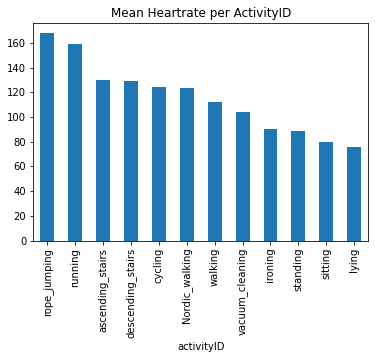

In [15]:
#activityID barchart boxplot

df_hr_act = dfd['heartrate_bpm'].groupby(dfd['activityID']).mean()

#sorting the bar chart into ascending heartrates
df_hr_act.sort_values(ascending=False, inplace = True )
df_hr_act.index = df_hr_act.index.map(activityIDkey)
df_hr_act.plot(kind='bar')
plt.title('Mean Heartrate per ActivityID')

In [16]:
#What are the averages per activity?

dfd.groupby(['activityID']).mean()

,timestamp,heartrate_bpm,imu_hand_temp,imu_hand_3d_acceleration_1,imu_hand_3d_acceleration_2,imu_hand_3d_acceleration_3,imu_hand_3d_gyroscope_1,imu_hand_3d_gyroscope_2,imu_hand_3d_gyroscope_3,imu_hand_3d_magnetometer_1,...,imu_ankle_temp,imu_ankle_3d_acceleration_1,imu_ankle_3d_acceleration_2,imu_ankle_3d_acceleration_3,imu_ankle_3d_gyroscope_1,imu_ankle_3d_gyroscope_2,imu_ankle_3d_gyroscope_3,imu_ankle_3d_magnetometer_1,imu_ankle_3d_magnetometer_2,imu_ankle_3d_magnetometer_3
activityID,,,,,,,,,,,,,,,,,,,,,
1,206.580091,75.396550,32.732742,3.756578,2.018568,6.385424,-0.008764,0.008986,0.002238,-0.171106,...,32.994020,0.544743,-6.392343,-3.672087,0.012183,-0.005562,0.006445,-17.854605,20.721140,0.023530
2,506.136985,80.035071,33.266343,-1.376973,4.317854,5.179943,-0.002374,0.009722,-0.005765,3.519832,...,33.639048,8.866678,-0.310780,-2.492304,0.005227,-0.006177,0.005814,-22.735097,2.460055,21.006176
3,732.984055,88.367582,33.640534,-7.091734,3.217199,2.683870,0.005618,0.000884,-0.005340,27.557579,...,33.897290,9.368908,-0.827263,-2.087657,0.004788,-0.004786,0.004478,-22.396515,-0.328439,24.521866
4,2435.133555,112.452830,32.482349,-10.012624,2.470108,1.894922,-0.049856,0.025401,-0.008440,38.179269,...,33.813064,11.856911,0.506397,-3.172319,-0.000571,-0.107478,-0.067086,-37.209953,-0.895906,15.694330
5,3393.563315,159.094118,32.022837,-6.709552,4.249012,1.576684,-0.008865,0.336436,-0.015374,19.141812,...,33.106315,13.463779,2.422553,-3.904547,0.053800,0.006211,0.153229,-38.448878,-6.351850,13.274418
6,2986.473326,124.414501,32.420728,-4.311831,2.986762,7.529086,-0.056278,-0.005275,0.091610,29.415642,...,33.058510,9.280793,1.465412,-2.080847,0.123938,0.042004,0.002720,-41.304175,-5.650927,14.040563
7,2917.563502,123.505952,31.934922,-4.217568,5.043965,2.498619,0.022999,0.049373,-0.004116,18.412181,...,33.527651,12.274516,0.564078,-3.387095,0.028892,-0.122246,0.014809,-37.493414,-0.099960,14.412029
12,1806.156140,129.516093,33.516326,-8.739140,3.673413,1.606860,-0.337135,0.174845,0.105914,38.048284,...,34.176930,9.734887,1.454661,-3.142101,0.373505,0.144148,-0.020877,-35.639611,-4.919154,14.046774
13,1906.774399,129.079505,33.321219,-6.221895,2.871335,3.648378,0.254417,-0.106310,-0.191100,31.944753,...,34.161960,10.923985,0.952553,-2.639927,-0.394677,-0.246644,0.066514,-36.954259,-4.284169,20.225516


### 4.2 Correlations

Firstly, I would like to know the correlation between the data point of the development data set. Correlations are a good starting point to get a quick handle on the data set we have. In the graph below, the data points with a strong correlation is green. The descending line through the middle is to be ignored as it is just saying there as a string correlation between two of the same variables. 

We can see that there is also a correlation between chest and hand temperature and between the magnetometers.

<ipython-input-17-18899f0e143a>:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "PiYG",ax=ax)


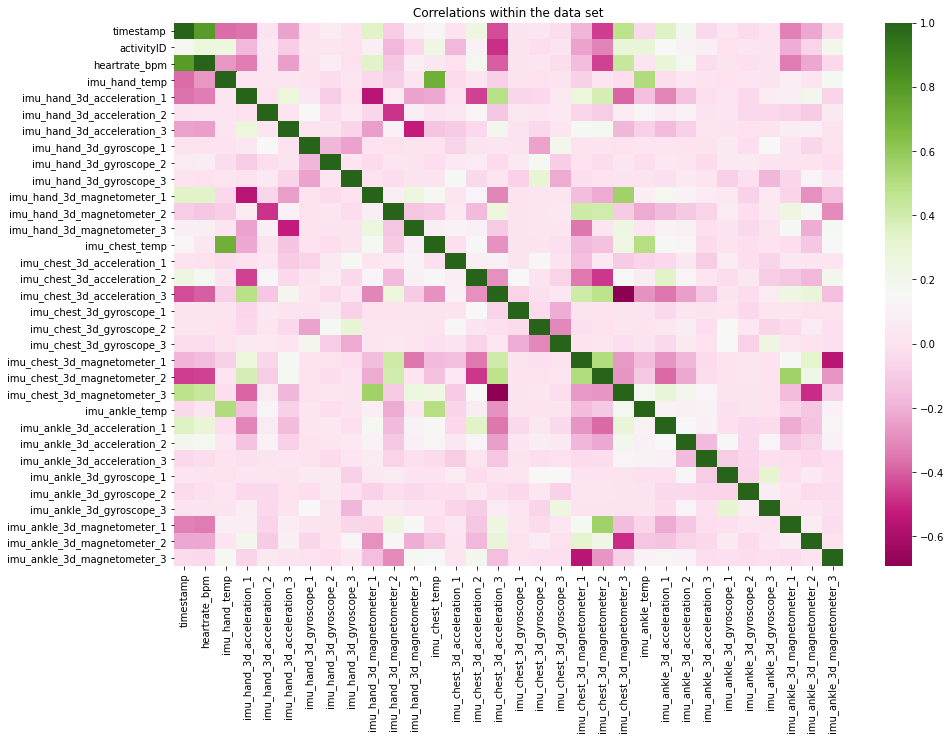

In [17]:
import seaborn as sns
from pandas.plotting import scatter_matrix
df_corr = dfd.corr()

#dropping activity ID for correlation 
df_corr = df_corr.drop(['activityID'], axis = 1)

f, ax = plt.subplots(figsize=(15, 10))
#plotting the correlations 
#setting the right colour to represent strong correlation as green 
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "PiYG",ax=ax)
plt.title('Correlations within the data set')
plt.show()

In [18]:
#Observing all the means per activity 

meansearies = dfd.groupby('activityID')['heartrate_bpm', 'imu_hand_temp', 'imu_hand_3d_acceleration_1',
       'imu_hand_3d_acceleration_2', 'imu_hand_3d_acceleration_3',
       'imu_hand_3d_gyroscope_1', 'imu_hand_3d_gyroscope_2',
       'imu_hand_3d_gyroscope_3', 'imu_hand_3d_magnetometer_1',
       'imu_hand_3d_magnetometer_2', 'imu_hand_3d_magnetometer_3',
       'imu_chest_temp', 'imu_chest_3d_acceleration_1',
       'imu_chest_3d_acceleration_2', 'imu_chest_3d_acceleration_3',
       'imu_chest_3d_gyroscope_1', 'imu_chest_3d_gyroscope_2',
       'imu_chest_3d_gyroscope_3', 'imu_chest_3d_magnetometer_1',
       'imu_chest_3d_magnetometer_2', 'imu_chest_3d_magnetometer_3',
       'imu_ankle_temp', 'imu_ankle_3d_acceleration_1',
       'imu_ankle_3d_acceleration_2', 'imu_ankle_3d_acceleration_3',
       'imu_ankle_3d_gyroscope_1', 'imu_ankle_3d_gyroscope_2',
       'imu_ankle_3d_gyroscope_3', 'imu_ankle_3d_magnetometer_1',
       'imu_ankle_3d_magnetometer_2', 'imu_ankle_3d_magnetometer_3'].mean()
sortedact = meansearies.sort_values('activityID', ascending=True)

sortedact

<ipython-input-18-14b4fa581bfa>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  meansearies = dfd.groupby('activityID')['heartrate_bpm', 'imu_hand_temp', 'imu_hand_3d_acceleration_1',


,heartrate_bpm,imu_hand_temp,imu_hand_3d_acceleration_1,imu_hand_3d_acceleration_2,imu_hand_3d_acceleration_3,imu_hand_3d_gyroscope_1,imu_hand_3d_gyroscope_2,imu_hand_3d_gyroscope_3,imu_hand_3d_magnetometer_1,imu_hand_3d_magnetometer_2,...,imu_ankle_temp,imu_ankle_3d_acceleration_1,imu_ankle_3d_acceleration_2,imu_ankle_3d_acceleration_3,imu_ankle_3d_gyroscope_1,imu_ankle_3d_gyroscope_2,imu_ankle_3d_gyroscope_3,imu_ankle_3d_magnetometer_1,imu_ankle_3d_magnetometer_2,imu_ankle_3d_magnetometer_3
activityID,,,,,,,,,,,,,,,,,,,,,
1,75.396550,32.732742,3.756578,2.018568,6.385424,-0.008764,0.008986,0.002238,-0.171106,9.263335,...,32.994020,0.544743,-6.392343,-3.672087,0.012183,-0.005562,0.006445,-17.854605,20.721140,0.023530
2,80.035071,33.266343,-1.376973,4.317854,5.179943,-0.002374,0.009722,-0.005765,3.519832,-14.512305,...,33.639048,8.866678,-0.310780,-2.492304,0.005227,-0.006177,0.005814,-22.735097,2.460055,21.006176
3,88.367582,33.640534,-7.091734,3.217199,2.683870,0.005618,0.000884,-0.005340,27.557579,-19.091959,...,33.897290,9.368908,-0.827263,-2.087657,0.004788,-0.004786,0.004478,-22.396515,-0.328439,24.521866
4,112.452830,32.482349,-10.012624,2.470108,1.894922,-0.049856,0.025401,-0.008440,38.179269,-10.292968,...,33.813064,11.856911,0.506397,-3.172319,-0.000571,-0.107478,-0.067086,-37.209953,-0.895906,15.694330
5,159.094118,32.022837,-6.709552,4.249012,1.576684,-0.008865,0.336436,-0.015374,19.141812,-22.759069,...,33.106315,13.463779,2.422553,-3.904547,0.053800,0.006211,0.153229,-38.448878,-6.351850,13.274418
6,124.414501,32.420728,-4.311831,2.986762,7.529086,-0.056278,-0.005275,0.091610,29.415642,-13.181587,...,33.058510,9.280793,1.465412,-2.080847,0.123938,0.042004,0.002720,-41.304175,-5.650927,14.040563
7,123.505952,31.934922,-4.217568,5.043965,2.498619,0.022999,0.049373,-0.004116,18.412181,-20.049217,...,33.527651,12.274516,0.564078,-3.387095,0.028892,-0.122246,0.014809,-37.493414,-0.099960,14.412029
12,129.516093,33.516326,-8.739140,3.673413,1.606860,-0.337135,0.174845,0.105914,38.048284,-12.523232,...,34.176930,9.734887,1.454661,-3.142101,0.373505,0.144148,-0.020877,-35.639611,-4.919154,14.046774
13,129.079505,33.321219,-6.221895,2.871335,3.648378,0.254417,-0.106310,-0.191100,31.944753,-13.415866,...,34.161960,10.923985,0.952553,-2.639927,-0.394677,-0.246644,0.066514,-36.954259,-4.284169,20.225516


Does temperature have any correlation with heartrate?

In [19]:
#grouping by activity
actseries=dfd.groupby('activityID')['heartrate_bpm','imu_hand_temp','imu_chest_temp','imu_ankle_temp'].mean()

#We want to present it in acending heartrates
groupedact = actseries.sort_values('heartrate_bpm', ascending=False)

#printing a table for inspection
groupedact

<ipython-input-19-edc5eb7c4442>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  actseries=dfd.groupby('activityID')['heartrate_bpm','imu_hand_temp','imu_chest_temp','imu_ankle_temp'].mean()


,heartrate_bpm,imu_hand_temp,imu_chest_temp,imu_ankle_temp
activityID,,,,
24,167.553450,31.339604,34.583254,32.929824
5,159.094118,32.022837,35.076276,33.106315
12,129.516093,33.516326,37.042163,34.176930
13,129.079505,33.321219,37.026681,34.161960
6,124.414501,32.420728,36.780196,33.058510
7,123.505952,31.934922,36.443980,33.527651
4,112.452830,32.482349,37.017302,33.813064
16,104.275056,34.170433,37.053034,34.457738
17,89.951334,34.021504,36.666473,34.275966


In [20]:
actseries=dfd.groupby('activityID')['heartrate_bpm','imu_hand_temp','imu_chest_temp','imu_ankle_temp'].mean()

#We want to present it in acending temperatures
groupedact = actseries.sort_values('imu_hand_temp', ascending=False)

#Print the activities for inspection
groupedact

<ipython-input-20-5c1aace6e27e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  actseries=dfd.groupby('activityID')['heartrate_bpm','imu_hand_temp','imu_chest_temp','imu_ankle_temp'].mean()


,heartrate_bpm,imu_hand_temp,imu_chest_temp,imu_ankle_temp
activityID,,,,
16,104.275056,34.170433,37.053034,34.457738
17,89.951334,34.021504,36.666473,34.275966
3,88.367582,33.640534,36.167544,33.897290
12,129.516093,33.516326,37.042163,34.176930
13,129.079505,33.321219,37.026681,34.161960
2,80.035071,33.266343,35.831983,33.639048
1,75.396550,32.732742,35.094228,32.994020
4,112.452830,32.482349,37.017302,33.813064
6,124.414501,32.420728,36.780196,33.058510


In [21]:
#grouping with activity looking at the hand data
handseries=dfd.groupby('activityID')['heartrate_bpm','imu_hand_temp','imu_hand_3d_gyroscope_1', 'imu_hand_3d_gyroscope_2',
       'imu_hand_3d_gyroscope_3', 'imu_hand_3d_magnetometer_1',
       'imu_hand_3d_magnetometer_2', 'imu_hand_3d_magnetometer_3', 'imu_hand_3d_acceleration_1',
       'imu_hand_3d_acceleration_2', 'imu_hand_3d_acceleration_3'].mean()


#We want to present in ascending activity 
groupedhands= handseries.sort_values('activityID', ascending=False)

#print the activities for inspection
groupedhands

<ipython-input-21-63380775f82b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  handseries=dfd.groupby('activityID')['heartrate_bpm','imu_hand_temp','imu_hand_3d_gyroscope_1', 'imu_hand_3d_gyroscope_2',


,heartrate_bpm,imu_hand_temp,imu_hand_3d_gyroscope_1,imu_hand_3d_gyroscope_2,imu_hand_3d_gyroscope_3,imu_hand_3d_magnetometer_1,imu_hand_3d_magnetometer_2,imu_hand_3d_magnetometer_3,imu_hand_3d_acceleration_1,imu_hand_3d_acceleration_2,imu_hand_3d_acceleration_3
activityID,,,,,,,,,,,
24,167.553450,31.339604,0.169402,0.572490,-0.156181,29.768727,-17.692110,-9.761562,-5.400178,3.266017,0.821490
17,89.951334,34.021504,0.002415,0.020066,0.002729,3.616550,-25.505825,-38.048815,-3.369453,3.734848,5.484141
16,104.275056,34.170433,0.002921,0.001622,-0.006121,30.343557,-10.566788,-18.295363,-7.207438,3.589560,1.895451
13,129.079505,33.321219,0.254417,-0.106310,-0.191100,31.944753,-13.415866,-23.848863,-6.221895,2.871335,3.648378
12,129.516093,33.516326,-0.337135,0.174845,0.105914,38.048284,-12.523232,-18.333501,-8.739140,3.673413,1.606860
7,123.505952,31.934922,0.022999,0.049373,-0.004116,18.412181,-20.049217,-20.410378,-4.217568,5.043965,2.498619
6,124.414501,32.420728,-0.056278,-0.005275,0.091610,29.415642,-13.181587,-42.915979,-4.311831,2.986762,7.529086
5,159.094118,32.022837,-0.008865,0.336436,-0.015374,19.141812,-22.759069,-21.450725,-6.709552,4.249012,1.576684
4,112.452830,32.482349,-0.049856,0.025401,-0.008440,38.179269,-10.292968,-18.520008,-10.012624,2.470108,1.894922


### 4.3 Exploring heartrate

In the correlations, it was evident that there is an increase in heartrate during some exercises. This needs further investigation. 

In [22]:
#What does the heartrate data look like?

print(dfd['heartrate_bpm'].mean())
print(dfd['heartrate_bpm'].min())
print(dfd['heartrate_bpm'].max())

104.96589609743972
57.0
202.0


Text(0, 0.5, 'Activity ID')

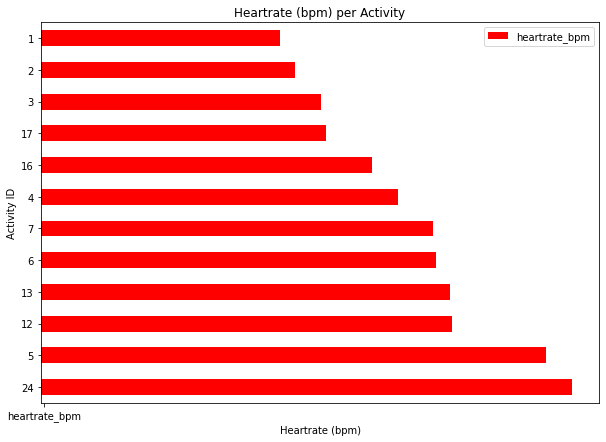

In [23]:
#visualising the heartrate means per activity 

heart_dfd=dfd.groupby(['activityID']).mean()
heart_dfd.sort_values('heartrate_bpm', ascending=False, inplace = True )
heart_dfd[['heartrate_bpm']].plot.barh(stacked=True, title = 'Heartrate (bpm) per Activity'
                                       , color='r', figsize=(10,7));
dfd['heartrate_bpm'].plot(kind='box')
plt.xlabel('Heartrate (bpm)')
plt.ylabel('Activity ID')

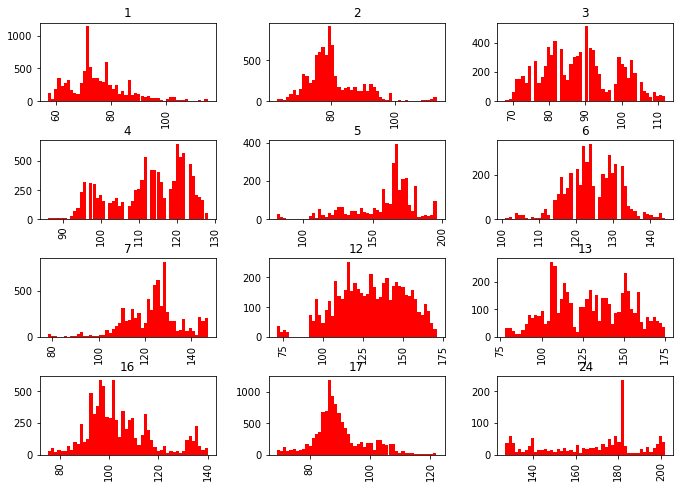

In [24]:
#looking at the heartrate range over activityIDs with histograms

dfd.hist(column='heartrate_bpm', by='activityID', figsize=(11,8), bins=50, color='red')
dfd.index = dfd.index.map(activityIDkey)

Text(0.5, 0, 'Activity ID')

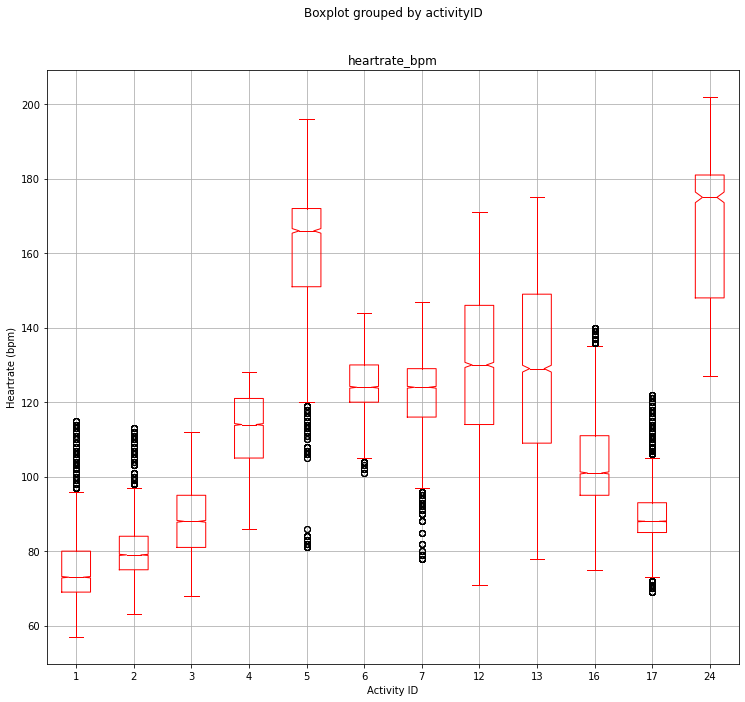

In [25]:
#using heartrate and activity
heart_activity=dfd.loc[:,['heartrate_bpm','activityID']]

# get frequencies
counts1=heart_activity.groupby('activityID').count().reset_index('activityID')

#set the number we consider to be 'big' in terms of films made so that we can plot heartrate
n=50 

#Making the index by frequencies
bigcounts1=counts1[counts1.heartrate_bpm>n]['activityID']
bigheart1_df = heart_activity[heart_activity.activityID.isin(bigcounts1)]
bigheart1_df.boxplot(by='activityID',figsize=(12,11), color='red', notch=True, vert=True)
#setting labels 
plt.ylabel('Heartrate (bpm)')
plt.xlabel('Activity ID')


### 4.4 Exploring Temperature

When exploring temperature, the focus will mainly be on **chest temperature** as this is the most consistent and will have the least influence from external sources.

Text(0, 0.5, 'Activity ID')

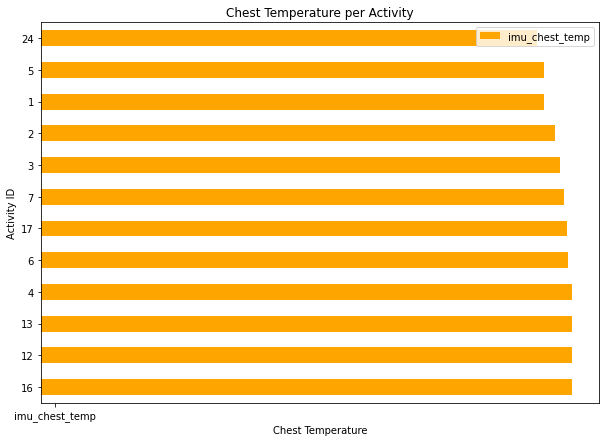

In [26]:
#looking at the temperatues within each activity
#mean temperature per activity
chest_dfd=dfd.groupby(['activityID']).mean()
chest_dfd.sort_values('imu_chest_temp', ascending=False, inplace = True )
chest_dfd[['imu_chest_temp']].plot.barh(stacked=True, title = 'Chest Temperature per Activity'
                                       ,  color='orange', figsize=(10,7));

dfd['imu_chest_temp'].plot(kind='box')
plt.xlabel('Chest Temperature')
plt.ylabel('Activity ID')

Text(0.5, 0, 'Activity ID')

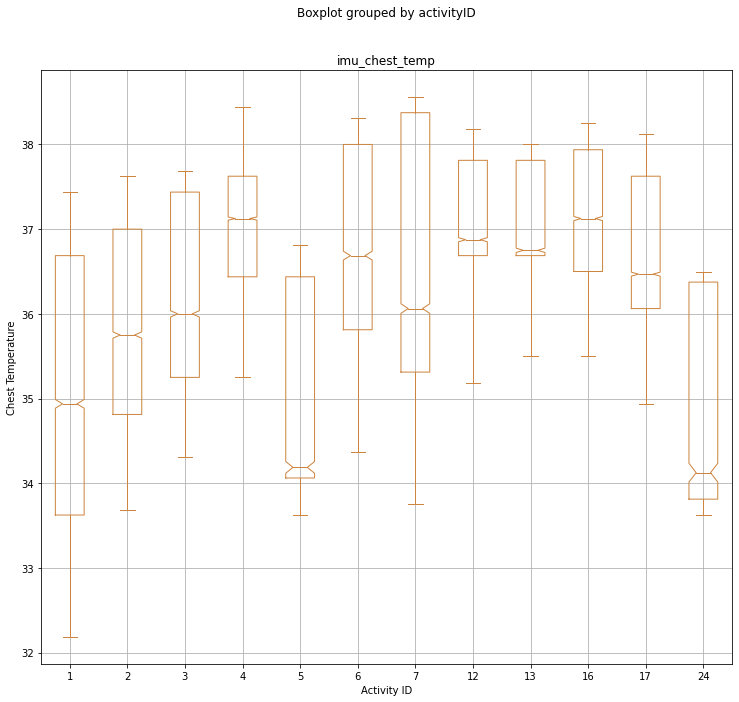

In [27]:
#using heartrate and activity
temp_activity=dfd.loc[:,['imu_chest_temp','activityID']]

# get frequencies
counts2=temp_activity.groupby('activityID').count().reset_index('activityID')

#set the number we consider to be 'big' in terms of films made so that we can plot temperatues
n=50 

#Making the index by frequencies
bigcounts2=counts2[counts2.imu_chest_temp>n]['activityID']
bigtemp1_df = temp_activity[temp_activity.activityID.isin(bigcounts2)]
bigtemp1_df.boxplot(by='activityID',figsize=(12,11), color='peru', notch=True, vert=True)
#setting labels 
plt.ylabel('Chest Temperature')
plt.xlabel('Activity ID')


### 4.5 Exploring Moving and Non-Moving Activities

Remembering the note above that I have defined moving activities as those where the subject is moving in leg positions.

In [28]:
print(dfd.shape)

#grouping the activities

movingact = ['4','5','6','7','12','13','16','24']
stillact = ['1','2','3','9','17']

#creating two dataframes - one for moving and one for still

movingdfd=dfd.loc[(dfd['activityID']==4)|(dfd['activityID']==5)|(dfd['activityID']==6)|
                  (dfd['activityID']==7)|(dfd['activityID']==12)|(dfd['activityID']==13)|(dfd['activityID']==16)|
                  (dfd['activityID']==24)]

stilldfd=dfd.loc[(dfd['activityID']==1)|(dfd['activityID']==2)|(dfd['activityID']==3)|
                  (dfd['activityID']==9)|(dfd['activityID']==17)]

#checking the shapes of the new dataframes
print(movingdfd.shape)
print(stilldfd.shape)

(80460, 34)
(43861, 34)
(36599, 34)


GREEN is moving activities
BLUE is still activities
The average heartrate for moving activities is 122.59832197168328
The average heartrate for still activities is 83.83483155277466


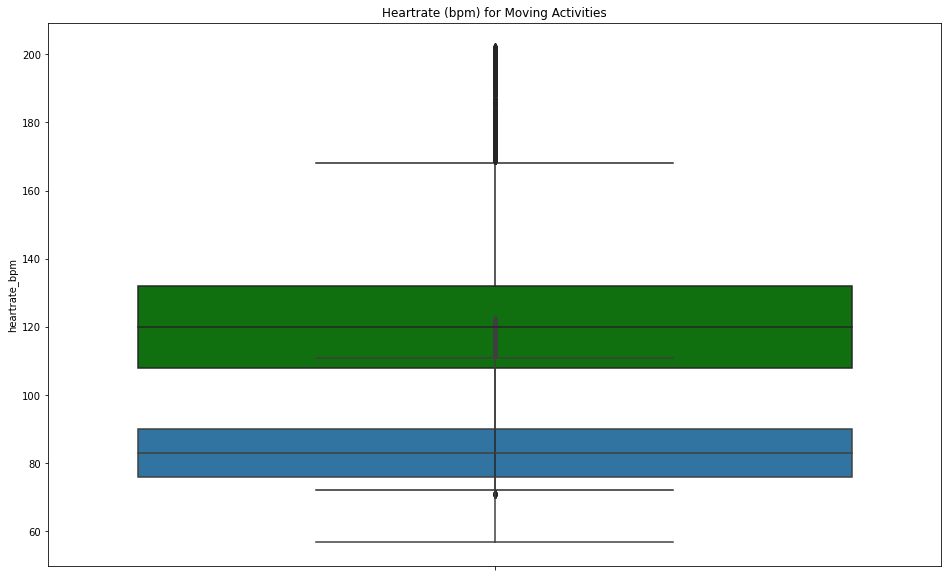

In [29]:
import seaborn as sns

#plotting two boxplots showing the heartrate for moving and still activities


fig, ax = plt.subplots(figsize=(16,10))
plt.title("Heartrate (bpm) for Moving Activities")
ax = sns.boxplot(y=movingdfd["heartrate_bpm"],color='g')
ax = sns.boxplot(y=stilldfd["heartrate_bpm"])


#What are the average heartrates?
print('GREEN is moving activities')
print('BLUE is still activities')
print('The average heartrate for moving activities is '+ str(movingdfd['heartrate_bpm'].mean()))
print('The average heartrate for still activities is '+ str(stilldfd['heartrate_bpm'].mean()))

### 4.6 Exploring the Subjects

*Who are the subjects?*
It is important to know who the subjects are that were being tested.

Age range: 23-32
Avg BMI: 
Avg Height:
Avg Weight:

In [30]:
sidf.head()

,Subject ID,Sex,Age (years),Height (cm),Weight (kg),BMI,Resting HR (bpm),Max HR (bpm),Dominant Hand
0,101,Male,27,182,83,25.057360,75,193,right
1,102,Female,25,169,78,27.309968,74,195,right
2,103,Male,31,187,92,26.309017,68,189,right
3,104,Male,24,194,95,25.241790,58,196,right
4,105,Male,26,180,73,22.530864,70,194,right


In [32]:
sidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Subject ID        9 non-null      int64  
 1   Sex               9 non-null      object 
 2   Age (years)       9 non-null      int64  
 3   Height (cm)       9 non-null      int64  
 4   Weight (kg)       9 non-null      int64  
 5   BMI               9 non-null      float64
 6   Resting HR (bpm)  9 non-null      int64  
 7   Max HR (bpm)      9 non-null      int64  
 8   Dominant Hand     9 non-null      object 
dtypes: float64(1), int64(6), object(2)
memory usage: 776.0+ bytes


In [33]:
actdf.head()

,Activity,subject101,subject102,subject103,subject104,subject105,subject106,subject107,subject108,subject109,Sum,Nr. of subjects
0,1 - lying,271.86,234.29,220.43,230.46,236.98,233.39,256.10,241.64,0.0,1925.15,NaN
1,2 - sitting,234.79,223.44,287.60,254.91,268.63,230.40,122.81,229.22,0.0,1851.80,NaN
2,3 - standing,217.16,255.75,205.32,247.05,221.31,243.55,257.50,251.59,0.0,1899.23,NaN
3,4 - walking,222.52,325.32,290.35,319.31,320.32,257.20,337.19,315.32,0.0,2387.53,NaN
4,5 - running,212.64,92.37,0.00,0.00,246.45,228.24,36.91,165.31,0.0,981.92,NaN


---

## Part 5: Hypothesis testing <a class="anchor" id="hypo"></a>

For our hypothesis testing, we will use the `test` data frame.


**Our 3 Hypotheses:** 

> 1. ***If*** higher heartrate is related to moving, ***then*** exercising will have a higher heartbeat than average 
(105bpm).

> 2. ***If*** higher heartrate is related to intense activities, ***then*** running and rope jumping will have a higher heartbeat than moving activity average (122bpm).

> 3. ***If*** higher temperature is related to running, ***then*** exercising will imply a higher temperature than average.

> 4. ***If*** timestamp is related to activity starting, ***then*** timestamp greater than the minimum is related to starting an activity.



<div class="alert alert-block alert-info">
<b>Please note</b> the average heartrate for our data set is 105bpm and temperature is 36 Celsius.
</div>


### 5.1 Our first testable hypothesis

***If*** higher heartrate is related to moving, ***then*** exercising will have a higher heartbeat than average (105bpm)..

In order to test this hypothesis, we will need to conduct an upper-tailed test. This is because we are hypothesising that there is an increase in heartrate when moving.

***

> $H_0: μ = μ_0$ Our null hypothesis, that there is no change.

> $H_1: μ > μ_0$ The research hypothesis, that **higher heartrate** implies a moving exercise.

$α =0.05$

$μ_0 = 105bpm $ This is the average heartrate across the bpm data.

***
The significance level ($α$) is the probability that we will reject the null hypothesis, assuming its true. 

In [34]:
#creating two data frames, moving and not moving 
#both for the test data frame
movingdft=dft.loc[(dft['activityID']==4)|(dft['activityID']==5)|(dft['activityID']==6)|
                  (dft['activityID']==7)|(dft['activityID']==12)|(dft['activityID']==13)|(dft['activityID']==16)|
                  (dft['activityID']==24)]

stilldft=dft.loc[(dft['activityID']==1)|(dft['activityID']==2)|(dft['activityID']==3)|
                  (dft['activityID']==9)|(dft['activityID']==17)]

#importing scipy
from scipy import stats
movingheart_means=movingdft.groupby("activityID")["heartrate_bpm"].mean()
movingheart_std=movingdft.groupby("activityID")["heartrate_bpm"].std()
movingheart_count=movingdft.groupby("activityID")["heartrate_bpm"].count()

#here I am look at the mean value hearrate for each activity 

P_G = (movingheart_means-105)/(movingheart_std/np.sqrt(movingheart_count))
print('Mean for each moving exercise heartrate from data: ',movingheart_means)

Mean for each moving exercise heartrate from data:  activityID
4     112.286981
5     157.041115
6     124.733731
7     123.720963
12    129.560105
13    129.217310
16    104.100440
24    168.020750
Name: heartrate_bpm, dtype: float64


In [35]:
#taking mean, std and count of the moving rate
movingheart_means=movingdft["heartrate_bpm"].mean()
movingheart_std=movingdft["heartrate_bpm"].std()
movingheart_count=movingdft["heartrate_bpm"].count()

#here I am calculating the p value, I am taking the mean heartrate value from the moving activities
#average heartrate is 105
#then dividing this value by the moving activity standard deviation 

P_G = (movingheart_means-105.00)/(movingheart_std/np.sqrt(movingheart_count))
print('P_G is: '+ str(P_G))
p_value_from_normal=(1-stats.norm.cdf(P_G))
print('Mean for moving exercise heartrate from data: ',movingheart_means)
print ('one tail p value from normal: ', p_value_from_normal)

P_G is: 167.13448375089035
Mean for moving exercise heartrate from data:  122.48493727680615
one tail p value from normal:  0.0


Above, I conducted a z-test that is looking at the probability that our hypothesis is wrong, i.e. the null hypothesis is true. The p-value (*probability value*) is a number describing how likely it is that your data would have occurred by random chance (i.e. that the null hypothesis is true).

Our p value (0.0) is less than the significance level ($α =0.05$). This indicates very strong evidence that we should reject our null hypothesis. Therefore, we reject the null hypothesis and accept our first hypothesis that a **higher heartrate** indicates **moving exercise**.

In [36]:
#taking mean, std and count of the still rate
stillheart_means=stilldft["heartrate_bpm"].mean()
stillheart_std=stilldft["heartrate_bpm"].std()
stillheart_count=stilldft["heartrate_bpm"].count()

#here I am calculating the p value, I am taking the mean heartrate value from the still activities
#average heartrate is 105
#then dividing this value by the still activity standard deviation 

P_G = (stillheart_means-105.00)/(stillheart_std/np.sqrt(stillheart_count))
print('P_G is: '+ str(P_G))
p_value_from_normal=(1-stats.norm.cdf(P_G))
print('Mean for still exercise heartrate from data: ',stillheart_means)
print ('one tail p value from normal: ', p_value_from_normal)

P_G is: -358.10972101573606
Mean for still exercise heartrate from data:  84.01316111488784
one tail p value from normal:  1.0


### 5.2 Our second testable hypothesis

***If*** higher heartrate is related to intense activities, ***then*** running and rope jumping will have a higher heartbeat than moving activity average (122bpm).

In order to test this hypothesis, we will need to conduct an upper-tailed test. This is because we are hypothesising that there is an increase in heartrate when running and ropejumping.

***
 
> $H_0: μ = μ_0$ Our null hypothesis, that there is no change.

> $H_1: μ > μ_0$ The research hypothesis, that **higher heartrate** implies a intense activities.

$α =0.05$

$μ_0 = 122bpm $

<div class="alert alert-block alert-info">
    <b>Please note</b> the average heart rate for <i>moving</i> activities is 122bpm.
</div>

***

In [37]:
runningropedft = dft.loc[(dft.activityID==5)|(dft.activityID==24)]

In [38]:
#running temp

runningtemp_means=runningropedft["heartrate_bpm"].mean()
runningtemp_std=runningropedft["heartrate_bpm"].std()
runningtemp_count=runningropedft["heartrate_bpm"].count()

#here I am calculating the p value, I am taking the mean running temp and taking away the average
#then diving this value by the running temp standard diviation

P_G = (runningtemp_means-122)/(runningtemp_std/np.sqrt(runningtemp_count))
print('P_G is: '+ str(P_G))
p_value_from_normal=(1-stats.norm.cdf(P_G))
print('Mean heartrate when running or ropejumping: ',runningtemp_means)
print ('one tail p value from normal: ', p_value_from_normal)

P_G is: 105.62339432314663
Mean heartrate when running or ropejumping:  160.31982840800762
one tail p value from normal:  0.0


Our p value (0.0) is less than the significance level ($α =0.05$). This indicates very strong evidence that we should reject our null hypothesis. Therefore, we reject the null hypothesis and accept our first hypothesis that a **heartrate above 122bpm** indicates **intense exercise** (such as running, rope-jumping).

### 5.2 Our third testable hypothesis

***If*** higher temperature is related to running, ***then*** exercising will imply a higher temperature than average.

In order to test this hypothesis, we will need to conduct an upper-tailed test. This is because we are hypothesising that there is an increase in temperature when running.

***

> $H_0: μ = μ_0$ Our null hypothesis, that there is no change.

> $H_1: μ > μ_0$ The research hypothesis, that **higher temperature** implies a running.

$α =0.05$

$μ_0 = 36 $ This is the average temperature across our data.

<div class="alert alert-block alert-info">
<b>Please note</b> running is ActivityID 5
</div>

***

In [39]:
#what does the test set look like?

dft

,subject,timestamp,activityID,heartrate_bpm,imu_hand_temp,imu_hand_3d_acceleration_1,imu_hand_3d_acceleration_2,imu_hand_3d_acceleration_3,imu_hand_3d_gyroscope_1,imu_hand_3d_gyroscope_2,...,imu_ankle_temp,imu_ankle_3d_acceleration_1,imu_ankle_3d_acceleration_2,imu_ankle_3d_acceleration_3,imu_ankle_3d_gyroscope_1,imu_ankle_3d_gyroscope_2,imu_ankle_3d_gyroscope_3,imu_ankle_3d_magnetometer_1,imu_ankle_3d_magnetometer_2,imu_ankle_3d_magnetometer_3
1,101p,37.81,1,100.0,30.3750,2.246150,7.48180,5.55219,-0.431227,0.002685,...,30.7500,9.73536,-2.036810,0.019118,0.005819,-0.017912,0.015243,-60.7820,-36.2116,-58.4891
5,101p,38.25,1,101.0,30.3750,2.549540,7.63122,5.55623,-0.487667,-0.019958,...,30.7500,9.66059,-1.808200,-0.021657,0.005473,-0.003154,0.025621,-60.5521,-36.5522,-58.3708
6,101p,38.36,1,101.0,30.3750,2.824070,6.14490,5.06502,-0.781563,0.198873,...,30.7500,9.69872,-1.884700,0.017799,0.011453,-0.000398,0.001243,-61.1082,-36.4321,-57.6223
7,101p,38.47,1,101.0,30.3750,2.736260,7.94195,6.52017,-0.472414,0.279868,...,30.7500,9.58774,-1.846340,0.055012,0.003170,-0.019596,0.001829,-61.7855,-36.2931,-57.9867
11,101p,38.91,1,101.0,30.3750,-0.530751,7.62191,6.04895,0.179548,1.051120,...,30.7500,9.65520,-1.996760,-0.174900,0.012554,-0.019851,0.008941,-61.7860,-36.1844,-57.8617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160907,108p,3887.13,24,201.0,30.8125,1.549900,-9.75252,-4.44530,0.026142,-0.165929,...,31.6875,9.33841,-0.029067,-3.779190,-0.057015,0.065142,0.046579,-32.2368,12.3835,38.8660
160908,108p,3887.24,24,201.0,30.8125,1.564860,-8.95345,-4.17836,-0.554971,-0.259998,...,31.6875,9.27205,0.121033,-3.510670,0.011600,0.055103,0.023033,-31.3352,12.2110,39.2949
160911,108p,3887.56,24,201.0,30.8125,0.754323,-8.81963,-6.88507,0.247418,-0.280137,...,31.6875,9.34600,0.158849,-3.548740,-0.299871,0.027859,0.147208,-32.6293,12.9184,39.0058
160913,108p,3887.78,24,201.0,30.8125,0.440724,-9.23551,-2.77022,2.233370,0.320604,...,31.6875,9.38396,-0.373912,-3.429280,-0.021327,0.008685,0.053233,-32.5020,12.7825,38.7228


In [40]:
#creating a dataframe that is just for running

runningdft = dft.loc[(dft.activityID==5)]

In [41]:
runningdft

,subject,timestamp,activityID,heartrate_bpm,imu_hand_temp,imu_hand_3d_acceleration_1,imu_hand_3d_acceleration_2,imu_hand_3d_acceleration_3,imu_hand_3d_gyroscope_1,imu_hand_3d_gyroscope_2,...,imu_ankle_temp,imu_ankle_3d_acceleration_1,imu_ankle_3d_acceleration_2,imu_ankle_3d_acceleration_3,imu_ankle_3d_gyroscope_1,imu_ankle_3d_gyroscope_2,imu_ankle_3d_gyroscope_3,imu_ankle_3d_magnetometer_1,imu_ankle_3d_magnetometer_2,imu_ankle_3d_magnetometer_3
19585,101p,3136.13,5,125.0,31.0000,2.371540,8.24138,5.74395,-0.279118,-0.207532,...,33.3750,9.71245,-1.992100,-0.791775,0.077495,0.039526,0.004155,-98.1005,7.55577,-22.9352
19588,101p,3136.45,5,125.0,31.0000,1.876260,4.69394,7.44194,-1.114220,1.748620,...,33.3750,9.67232,-1.876990,-0.908670,-0.050110,-0.006431,-0.008428,-98.5550,7.79725,-23.3003
19590,101p,3136.67,5,125.0,31.0000,-0.127646,4.17893,7.49063,0.389019,1.525470,...,33.3750,9.66803,-2.065870,-1.023310,0.029171,-0.030504,-0.017898,-97.9870,7.87298,-22.1901
19598,101p,3137.55,5,125.0,31.0000,-2.762890,10.00490,3.27487,-0.064850,-0.092200,...,33.3750,9.86721,-1.233990,-0.756303,-0.002413,-0.005103,-0.027196,-97.9014,1.69414,-22.3805
19599,101p,3137.66,5,125.0,31.0000,-0.817240,8.11934,2.04029,-1.010910,-0.155790,...,33.3750,9.67218,-1.268530,-1.028220,0.000648,-0.017953,-0.004464,-98.0189,2.56940,-21.5037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160127,108p,3628.89,5,195.0,30.8125,0.679521,2.74683,9.27798,-0.017814,-0.023487,...,31.6875,9.06824,-0.329228,-4.011640,0.060811,-0.026769,-0.018568,-17.3033,11.47190,26.0129
160130,108p,3629.22,5,195.0,30.8125,0.530237,2.63485,9.35309,-0.006221,-0.042546,...,31.6875,9.14219,-0.291413,-4.049700,-0.024199,0.053295,0.037101,-18.3303,11.91020,26.2924
160131,108p,3629.33,5,195.0,30.8125,0.601805,2.63326,9.23871,-0.002547,0.029761,...,31.6875,9.18512,-0.293256,-3.856300,-0.010813,-0.007312,0.037356,-18.2049,12.16230,26.5762
160135,108p,3629.77,5,195.0,30.8125,0.570697,2.82459,9.39155,0.011127,0.038150,...,31.6875,9.14640,-0.330666,-3.895060,0.023179,-0.007246,0.007512,-17.6928,12.00760,26.4364


In [42]:
#running temp

runningtemp_means=runningdft['imu_chest_temp'].mean()
runningtemp_std=runningdft['imu_chest_temp'].std()
runningtemp_count=runningdft['imu_chest_temp'].count()

#here I am calculating the p value, I am taking the mean running temp and taking away the average
#then diving this value by the running temp standard diviation

P_G = (runningtemp_means-36)/(runningtemp_std/np.sqrt(runningtemp_count))
print('P_G is: '+ str(P_G))
p_value_from_normal=(1-stats.norm.cdf(P_G))
print('Mean temperature when running: ',runningtemp_means)
print ('one tail p value from normal: ', p_value_from_normal)

P_G is: -39.46602837318915
Mean temperature when running:  35.095268433571185
one tail p value from normal:  1.0


Our p value (1.0) is *greater* than the significance level ($α =0.05$). This indicates very strong evidence that we should reject our testable hypothesis. Therefore, we accept the null hypothesis and reject our first hypothesis that a **higher temperature** indicates **running**.

### 5.2 Our forth testable hypothesis

***If*** higher temperature is related to household chores, ***then*** ironing and vacuum cleaning will imply a higher temperature than average.

In order to test this hypothesis, we will need to conduct an upper-tailed test. This is because we are hypothesising that there is an increase in temperature when doing household chores.

***

> $H_0: μ = μ_0$ Our null hypothesis, that there is no change.

> $H_1: μ > μ_0$ The research hypothesis, that **higher temperature** implies household chores.

$α =0.05$

$μ_0 = 36 $ This is the average temperature across our data.

<div class="alert alert-block alert-info">
<b>Please note</b> household chores are defined as ActivityID 16 (vacuum cleaning) and 17 (ironing).
</div>

***



In [43]:
choresdft = dft.loc[(dft.activityID==16)|(dft.activityID==17)]

In [44]:
#chores temp

chorestemp_means=choresdft['imu_chest_temp'].mean()
chorestemp_std=choresdft['imu_chest_temp'].std()
chorestemp_count=choresdft['imu_chest_temp'].count()

#here I am calculating the p value, I am taking the mean chores temp value and taking away the average

P_G = (chorestemp_means-36)/(chorestemp_std/np.sqrt(chorestemp_count))
print('P_G is: '+ str(P_G))
p_value_from_normal=(1-stats.norm.cdf(P_G))
print('Mean temperature when doing chores: ',chorestemp_means)
print ('one tail p value from normal: ', p_value_from_normal)

P_G is: 121.92883706722087
Mean temperature when doing chores:  36.83189792875779
one tail p value from normal:  0.0


Our p value (0.0) is *less* than the significance level ($α =0.05$). This indicates very strong evidence that we should reject our null hypothesis. Therefore, we accept our first hypothesis that a **temperature greater than 36** indicates **they have done chores**.

--- 

## Part 6: Modeling Introduction <a class="anchor" id="model"></a>

*How should we choose between differing explanations of data?* Myung, (2000)[[5](#5)] stated that we select the one, amond candidate models, that *best* captures the underlying regularities. 

##### Supervised Learning

Supervised learning is defined by its use of labeled datasets to train algorithms that will classify data and predict outcomes. A model is trained, using the *development* data, until it can detect the relationships and patterns between input and output data labels. Then, when using unseen *test* data, the model will yield accurate results. 

Here, we will train two models and check their performance. The focus will be on two modeling algorithms, *Random Forest* and *Logistic Regression*.

Some definitions:

- True Positive: TP
- False Positive: FP

**Accuracy:**

The *accuracy* is only telling when the dataset is balanced between `dev` and `test`. As ours is, we can use this as a judge of each model.

**Precision:**
\begin{eqnarray*}
P=\frac{TP}{TP+FP}
\end{eqnarray*}

The *precision* is intuitively the ability of the classifier to not label a sample as positive if it is negative.

**Recall:** 
\begin{eqnarray*}
R=\frac{TP}{TP+FN}
\end{eqnarray*}

The *recall* is intuitively the ability of the classifier to find all the positive samples.

**F1-score:**
\begin{eqnarray*}
F1 = \frac{2\times P\times R}{P+R}
\end{eqnarray*}

The *F1 score* can be interpreted as a weighted harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. This score weights the recall more than the precision. If the f1 score is 1.0 this means recall and precision are equally important. 


### 6.1 Scaling the data set 

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedShuffleSplit
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix,roc_auc_score,roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,RobustScaler

#dropping columns we do not need
dfds = dfd.drop(["timestamp", "subject"],1)

#apply scaling to all columns except subject and activity 
scaler = RobustScaler()
df_scaled = dfds.copy()
df_scaled_test = dft.copy()

df_scaled.iloc[:,1:41] = scaler.fit_transform(df_scaled.iloc[:,1:41])
df_scaled_test.iloc[:,1:41] = scaler.fit_transform(df_scaled_test.iloc[:,1:41])

df_scaled.head()

,activityID,heartrate_bpm,imu_hand_temp,imu_hand_3d_acceleration_1,imu_hand_3d_acceleration_2,imu_hand_3d_acceleration_3,imu_hand_3d_gyroscope_1,imu_hand_3d_gyroscope_2,imu_hand_3d_gyroscope_3,imu_hand_3d_magnetometer_1,...,imu_ankle_temp,imu_ankle_3d_acceleration_1,imu_ankle_3d_acceleration_2,imu_ankle_3d_acceleration_3,imu_ankle_3d_gyroscope_1,imu_ankle_3d_gyroscope_2,imu_ankle_3d_gyroscope_3,imu_ankle_3d_magnetometer_1,imu_ankle_3d_magnetometer_2,imu_ankle_3d_magnetometer_3
NaN,2,-0.605263,0.833333,0.632428,0.758890,0.461104,-0.058651,-0.050517,-0.083170,-0.534968,...,0.000000,-0.311316,-0.645522,-0.071654,-0.015038,-0.078372,0.017949,-0.012521,-0.099432,0.268470
NaN,1,-0.684211,0.200000,1.483698,-0.197967,0.541603,0.115393,-0.087513,0.038696,-0.430248,...,0.347826,-6.597898,-2.366013,-0.477952,-0.049021,-0.151122,-0.002073,0.836053,0.754093,-0.807183
NaN,16,-0.263158,0.733333,-0.294699,-0.984344,-0.565588,-0.287114,1.915038,0.359981,1.168434,...,0.478261,0.098957,0.346768,-0.063735,-0.794492,1.158063,0.381517,0.935655,-0.027952,0.888731
NaN,12,1.657895,0.200000,-0.551654,0.097152,-0.250036,-2.064097,1.834339,-1.857976,-0.266234,...,0.521739,1.176198,-0.251395,-0.152227,-0.114978,1.398601,-0.999322,-0.976194,0.327421,-0.610844
NaN,12,0.473684,-0.400000,-0.307912,0.441735,-0.418997,-0.474059,0.853304,0.070826,-0.837059,...,-0.347826,0.022563,1.354814,-0.858045,1.136667,1.048552,2.380406,-0.860425,-0.525029,-1.203777


In [46]:
#dev data set 
x_dev = df_scaled.drop('activityID', axis=1).values
#y is the acitivity labels
y_dev = df_scaled['activityID'].values

# Test Dataset
x_test = df_scaled.drop('activityID', axis=1).values
#y is the activity labels
y_test = df_scaled['activityID'].values

In [47]:
#Function to calculate the accuracy,precision,recall,error and f1 score
def metricscalc (y_true,y_pred):
    a = accuracy_score(y_true, y_pred)
    e = 1-a
    p = precision_score(y_true, y_pred,average=None).mean()
    r = recall_score(y_true, y_pred, average=None).mean()
    f1 = f1_score(y_true, y_pred, average=None).mean()
    print("Accuracy: %.3f \nError: %.3f \nPrecesion: %.3f \nRecall: %.3f \nF1 score:%.3f \n"% (a,e,p,r,f1) )


### 6.2 Random Forest Classifier

*Random Forest* algorithm can be used for regression and classification which makes it an adaptable modeling algorithm. The random forest classifier works by creating a set of decision trees from our randomly selected *development* set. The algorithms creates and combines decision trees together, the accuracy of its predictions will be better the more trees there are, i.e. the forest is more robust [[6](#1)]. Random forest also works well with datasets with high dimensionality, which the PAMAP2 dataset set is.

This classifier was imported from `sklearn` and then trained and tested using our split, balanced data. The results showed the classifier is accurate and precise for this large data set.

In [48]:
#importing random forest from sklearn
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs =2)
#fitting the x dev and y dev to the random forest classifier
#training on dev data
rfc.fit(x_dev,y_dev)

#testing on test data 
y_pred_rf = rfc.predict(x_test)
metricscalc(y_test,y_pred_rf)

Accuracy: 1.000 
Error: 0.000 
Precesion: 1.000 
Recall: 1.000 
F1 score:1.000 



### 6.3 Logistic Regression

*Logistic regression* algorithm is another type of supervised learning classification. This algorithm is used to predict the probability of a target variable and is an extension for linear regression model for classification problems. 

The model, which was imported from sklearn, was trained using the `development` data then `tested` using test.  This model had high precision and accuracy which, as we have a balanced data set, implies that it is a good model. 

In [49]:
#importing the logistic regression function from sklearn 
log_reg = LogisticRegression()
#training the model on dev data 
log_reg.fit(X=x_dev, y=y_dev )

#using the test data to test for the scores
y_pred_lr = log_reg.predict(x_test)
metricscalc(y_test, y_pred_lr)  

Accuracy: 0.809 
Error: 0.191 
Precesion: 0.783 
Recall: 0.769 
F1 score:0.774 



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


***

## Part 7: Dimensionality Reduction and Principal Component Analysis <a class="anchor" id="pca"></a>

Reducing the number of dimensions that are used in our analysis will help the report more efficiently. Principal Component Analysis helps to detect the correlation between variables. If a strong correlation exists between our variables, we can then attempt to reduce the the dimensionality. As this protocol data is high-dimensional data, finding the directions of maximum variance would then make it possible to project it onto a smaller dimensional subspace.

Issues with PCA are that it can be quite slow and the directions of projection are dependent on data so it is necessary to have access to all of the data at once. 


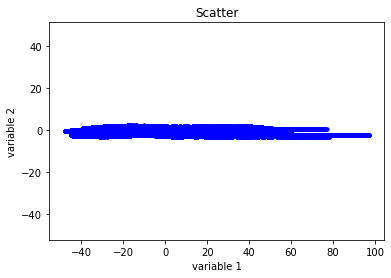

In [51]:
#function to plot the scatter
def plot_points(data, name='Scatter',axis_eq=True):
    """Plot the given 2d data on a scatter plot"""
    plt.scatter(data[:,0], data[:,1], marker='.', color='b')
    plt.title(name)8
    plt.xlabel('variable 1')
    plt.ylabel('variable 2')
    plt.axis('equal')

#only using relevent data points 
#removing time, subject and activity
df1=df.loc[:,'heartrate_bpm':'imu_ankle_3d_magnetometer_3']
#creating and array
df2=df1.to_numpy()

# We need to 'centre' the data, by subtracting the mean of each column.
df2 = df2 - df2.mean(axis=0)

# Slice the data by taking x = first column, y = second column.
x = df2[:, 0] #heartrate
y = df2[:, 12] #imu_chest_3d_acceleration_1

# Plot the data
plot_points(df2,axis_eq=False)


In [52]:
#For index references

df1.columns

Index(['heartrate_bpm', 'imu_hand_temp', 'imu_hand_3d_acceleration_1',
       'imu_hand_3d_acceleration_2', 'imu_hand_3d_acceleration_3',
       'imu_hand_3d_gyroscope_1', 'imu_hand_3d_gyroscope_2',
       'imu_hand_3d_gyroscope_3', 'imu_hand_3d_magnetometer_1',
       'imu_hand_3d_magnetometer_2', 'imu_hand_3d_magnetometer_3',
       'imu_chest_temp', 'imu_chest_3d_acceleration_1',
       'imu_chest_3d_acceleration_2', 'imu_chest_3d_acceleration_3',
       'imu_chest_3d_gyroscope_1', 'imu_chest_3d_gyroscope_2',
       'imu_chest_3d_gyroscope_3', 'imu_chest_3d_magnetometer_1',
       'imu_chest_3d_magnetometer_2', 'imu_chest_3d_magnetometer_3',
       'imu_ankle_temp', 'imu_ankle_3d_acceleration_1',
       'imu_ankle_3d_acceleration_2', 'imu_ankle_3d_acceleration_3',
       'imu_ankle_3d_gyroscope_1', 'imu_ankle_3d_gyroscope_2',
       'imu_ankle_3d_gyroscope_3', 'imu_ankle_3d_magnetometer_1',
       'imu_ankle_3d_magnetometer_2', 'imu_ankle_3d_magnetometer_3'],
      dtype='object')

In [53]:
#computing the covariance matrix
Sigma = df2.T.dot(df2)

#find eigenvectors and eigenvalues
u, v = np.linalg.eig(Sigma) 

print('Eigenvalues are: {}'.format(u))

# np.argsort orders in ascending order, [-1] indexes the final element of the list
max_eigen_index = np.argsort(u)[-1] 
min_eigen_index = np.argsort(u)[0]

#What is the largest eigenvalue?
print('The largest eigenvalue is at index : {}'.format(max_eigen_index))

#What is the smallest eigenvalue?
print('The smallest eigenvalue is at index : {}'.format(min_eigen_index))

Eigenvalues are: [2.36263648e+08 1.41518918e+08 1.01722556e+08 6.41704896e+07
 5.42623235e+07 5.16813543e+07 3.57057618e+07 2.92388541e+07
 2.00844409e+07 1.43449145e+07 8.31771077e+06 5.60369974e+06
 4.56611070e+06 3.59411654e+06 2.07190599e+06 2.00278471e+06
 1.26836684e+06 9.49658512e+05 6.49319842e+05 4.88890957e+05
 4.19626063e+05 3.09295561e+05 2.18949341e+05 1.59539625e+05
 9.07673194e+03 2.41214363e+04 3.59351313e+04 5.68423958e+04
 6.69873862e+04 1.01072995e+05 1.01370597e+05]
The largest eigenvalue is at index : 0
The smallest eigenvalue is at index : 24


**What does this mean?**

> *Eigenvectors* are unit vectors with length or magnitude equal to 1. They are often referred to as right vectors, which simply means a column vector.

> *Eigenvalues* are coefficients applied to eigenvectors that give the vectors their length or magnitude.

Above, it states that the largest eigenvalue is at the index 0 and the smallest is at 24. Each eigenvector is associated with one eigenvalue. If there are eigenvalues close to zero, they represent components that may be discarded. The eigenvalues explain the variance of the data along the new feature axes, as the index 0 has the highest variance (as it is the largest eigenvalue) this would be a good focus for **clustering** next. 

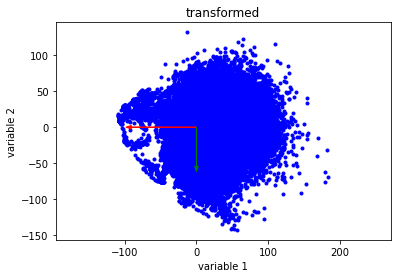

In [54]:
#plotting the points on our data set
transformed=df2.dot(v)
plot_points(transformed, name='transformed')

Sigma = transformed.T.dot(transformed)

#eigenvalue and eigenvector
u1,v1 = np.linalg.eig(Sigma)
total=sum(u1)
prop=[x/total for x in u1]

plt.arrow(0, 0, 300*prop[0]*v1[0,0], 300*prop[0]*v1[1,0] , color='r', head_width=5)
plt.arrow(0, 0, 300*prop[1]*v1[0,1],300*prop[1]*v1[1,1] , color='g', head_width=5);

The same PCA method has been done below using the sklearn.decomposition library[[6](#4)]. Below I have looked at the amount of variance ratio. Plotting this, against the number of components, is a telling way to see how many to use. 

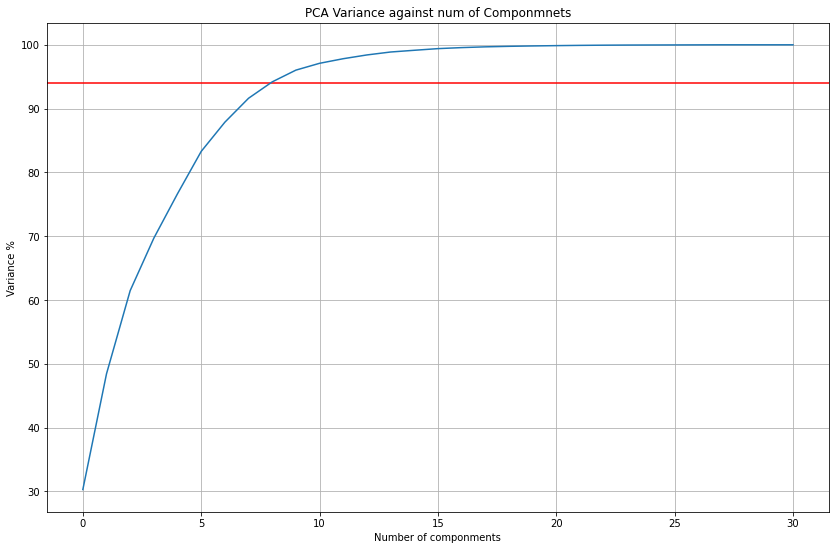

In [55]:
#trying PCA with sklearn

#using the sklearn function
from sklearn.decomposition import PCA
pca = PCA()
#fitting pca to the fit
pca.fit(df2)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

fig, ax = plt.subplots(figsize=(14,9))

plt.title("PCA Variance against num of Componmnets")
plt.ylabel("Variance %")
plt.xlabel("Number of componments")
l = plt.axhline(94, color="red")
plt.grid()
plt.plot(var1)


The figure above suggest that the number of components to use is around 8.

***


## Part 8: K Means Clustering <a class="anchor" id="kmeans"></a>

##### Unsupervised learning

K-means clustering is a simple method of unsupervised learning which, in contrast with *supervised learning*, makes inferences from the dataset without knowing the labels. The labels for our data set would be the activity number and so we will start by removing this. Removing the labels allows us to create clusters based on other information within the data. *Means* in K-Means clustering refers to finding the mean (i.e average) within the data set.

### 8.1 How many clusters should we use?

First, as this is an unsupervised learning model, it is necessary to remove all labels from the data set that could be pre-created clusters. For this data, I have removed `subject` and `activityID`. We then normalize the data set using the `StandardScaler`. To check, the normalized data should have a mean of 0 and standard deviation of 1.

In [56]:
#normalising the data
#checking our mean and standard deviation 

from sklearn.preprocessing import StandardScaler

#converting the labels into strings
labels = df['activityID']
#dropping unneeded columns for clustering 
df3 = df.drop(['subject','timestamp', 'activityID'], axis = 1)

labels_keys = labels.unique().tolist()
labels = np.array(labels)

#Checking the activity labels are correct
print('Activity labels: ' + str(labels_keys))

#using the standardisation function to normalise df3
df3 = StandardScaler().fit_transform(df3)

#checking when the normalized data has a mean of zero and sd of 1
print('The mean: ' +str(np.mean(df3)))
print('The standard deviation: '+str(np.std(df3)))

Activity labels: [1, 2, 3, 17, 16, 12, 13, 4, 7, 6, 5, 24]
The mean: 6.239856631572901e-17
The standard deviation: 1.0000000000000002


In [57]:
#What are the labels?
labels

array([ 1,  1,  1, ..., 24, 24, 24])

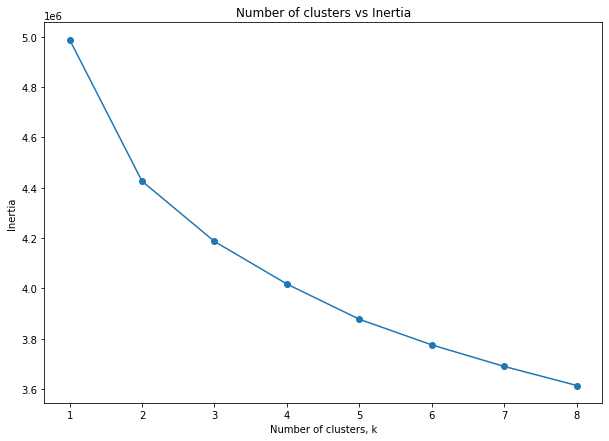

In [58]:
#checking the optimal k value 

#Number of potential clusters 
ks = range(1, 9)
inertias = []

#KMeans imported from sklearn
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df3)
    inertias.append(model.inertia_)

plt.figure(figsize=(10,7))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Number of clusters vs Inertia')

#plotting x labels with number of clusters
plt.xticks(ks)

#showing the graph
plt.show()

Looks like the best cluster is at the elbow of the graph, 2 or 3 clusters.

In [59]:
#this function applies k-means clustering alrorithm on a dataset 
#and prints the crosstab of cluster and actual labels 
#and clustering performance parameters (ARI and silhouette).

def k_means(n_clust, data_frame, true_labels):
    k_means = KMeans(n_clusters = n_clust, n_init=30)
    k_means.fit(data_frame)
    c_labels = k_means.labels_
    df = pd.DataFrame({'clust_label': c_labels, 'orig_label': true_labels.tolist()})
    ct = pd.crosstab(df['clust_label'], df['orig_label'])
    y_clust = k_means.predict(data_frame)
    display(ct)
    #printing the values for each of the outcomes
    print('% 9s' % 'Inertia  ARI     Silhouette')
    print('%i %.3f   %.3f'
      %(k_means.inertia_,
      adjusted_rand_score(true_labels, y_clust),
      silhouette_score(data_frame, y_clust, metric='euclidean')))
    


In [60]:
#Looking at Silhouette and ARI for 2 clusters
k_means(n_clust=2, data_frame=df3, true_labels=labels)


orig_label,1,2,3,4,5,6,7,12,13,16,17,24
clust_label,,,,,,,,,,,,
0,15971,47,0,0,21,1,8,1,16,0,0,28
1,1570,16834,17256,19782,5812,8749,14319,10698,9569,15997,21696,2544


Inertia  ARI     Silhouette
4425678 0.041   0.192


In [61]:
#Looking at Silhouette and ARI for 3 clusters
k_means(n_clust=3, data_frame=df3, true_labels=labels)


orig_label,1,2,3,4,5,6,7,12,13,16,17,24
clust_label,,,,,,,,,,,,
0,973,523,1814,15373,4954,6957,10006,9015,5955,8961,258,2535
1,15967,3,0,0,17,1,7,0,16,0,0,19
2,601,16355,15442,4409,862,1792,4314,1684,3614,7036,21438,18


Inertia  ARI     Silhouette
4185998 0.158   0.119


In [62]:
#Looking at Silhouette and ARI for 4 clusters
k_means(n_clust=4, data_frame=df3, true_labels=labels)


orig_label,1,2,3,4,5,6,7,12,13,16,17,24
clust_label,,,,,,,,,,,,
0,15960,0,0,0,9,1,8,0,15,0,0,16
1,462,424,366,7168,2956,4387,5724,3069,3138,3582,26,1547
2,200,15568,5426,705,250,2711,2556,478,2332,3259,19937,54
3,919,889,11464,11909,2618,1651,6039,7152,4100,9156,1733,955


Inertia  ARI     Silhouette
4016688 0.192   0.083


**Evaluating the different cluster sizes**

*Silhouette score*

In order to evaluate the quality of each of our clusters, the silhouette score needs to be calculated. The silhouette score is calculated for each sample of different clusters. 
The value of the silhouette score varies from -1 to 1. If the score is 1, each cluster is concentrated and well-separated from other clusters [[8](#8)]. A value near 0 represents overlapping clusters with samples very close to the boundaries of the neighbouring clusters. A negative score indicates that the samples could have been assigned to the wrong clusters. We have a score of 0.192,0.119 and 0.083* when there are 2,3 and 4 clusters respectively. This implies overlapping clusters, as also confirmed by the graph below.

*Adjusted rand score (ARI)*

The ARI score is used to determine whether two cluster results are similar to each other. This value is equal to 0 when points are assigned into clusters randomly and it equals to 1 when two cluster results are same. Our ARI scores are 0.041, 0.158 and 0.192* respectively.

*Which cluster should we use?*

None of the silhouette and ARI scores are very telling as they are all below 0.2. However, 3 clusters has the *best* overall score so I will choose this for the number of clusters to use below. 

*What are the disadvantages of k-means?*

The k-means algorithm must access every point in the dataset and thus can be relatively slow as the number of samples grow. As this large dataset has been down sampled, it is not too slow but this is good to note for any further projects.

<div class="alert alert-block alert-info">
<b>*Please note</b> these scores may change if the kernal is re-run. 
</div>


### 8.2 Visualising the clusters

From the ARI and silhouette score, I have chosen to use  clusters and will visualise these clusters below. As predicted from the low ARI and Silhouette score, the clusters are overlapping and not distinct. This could be prevented, if done again, by the overlapping k-means algorithm which is an extension of this traditional k-means algorithm below [[9](#1)]. 

[1 1 1 ... 1 1 1]


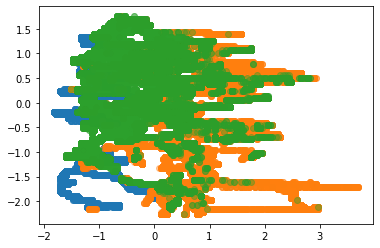

In [63]:
#Plotting the clusters

from sklearn import cluster

#specifiying the number of clusters
K=3
clf=cluster.KMeans(init='random',n_clusters=K)
clf.fit(df3)  

print(clf.predict(df3))

#importing collections from a library
from collections import defaultdict

#setting a function to divide the data into labels
#coordinating the points to be put in appropriate lists 
def divide(data,labels):
    xclusters=defaultdict(list)
    yclusters=defaultdict(list)
    for datapoint,label in zip(data,labels):
        x=datapoint[0]
        y=datapoint[1]
        xclusters[label].append(x)
        yclusters[label].append(y)
    return xclusters,yclusters

#dividing clusters 
clusters=divide(df3,clf.predict(df3))

#plotting the clusters 
plt.scatter(clusters[0][0],clusters[1][0],alpha=0.4)
plt.scatter(clusters[0][1],clusters[1][1],alpha=0.4)
plt.scatter(clusters[0][2],clusters[1][2],alpha=0.4)


***

## Part 9: Summary <a class="anchor" id="summary"></a>

In summary, using evidence from the PAMAP2 data set, this report investigated and analysed information on subjects partaking in physical activities. The dataset recorded 18 data points over time.  The goal of this report was to derive actionable insights to support the development of a hardware/software which can determine the type of physical activity carried out by an individual. 

**Handling missing and dirty data**

In order to have clean and filtered data, pre-processing steps were needed. This meant cleaning the data that could have been error, removal of `NaN` values and down sampling. Then, to make sure no assumptions are being made about the data, the data was split 50% 50% into `dev` and `test` set.


**Thorough exploratory data analysis**

To get to grips with the dataset, initial exploration of averages and correlations was important. This showed that there was a correlations between the average `heartrate` and the type of activity. This then lead to a further analysis of the type of activity and heartrate which gave strong evidence that the heartrate changes when the subjects were changing activities. After this, some exploration of moving and not-moving activities was necessary. This then showed that , when moving, the subjects mean heartrate was *higher* then when still. This was then remembered as a potential hypothesis. 

Temperature also stood out as something to explore in the EDA, there were slight correlations within temperature but the distinction between activities was not as clear as heartrate. There were also correlations with `magnetometer_3`, and activity type but it was not as strong so did not look further, this could be a good step if we were to take this report for further anaysis though. 


The next step was to **develop and test 4 hypotheses**:

 1. ***If*** higher heartrate is related to moving, ***then*** exercising will have a higher heartbeat than average (105bpm).
 
 > This was **<span style="color:green">true</span>**
 
 2. ***If*** higher heartrate is related to intense activities, ***then*** running and rope jumping will have a higher heartbeat than moving activity average (122bpm).
 
 > This was **<span style="color:green">true</span>**

 3. ***If*** higher temperature is related to running, ***then*** exercising will imply a higher temperature than average.
 
 > This was **<span style="color:red">false</span>**

 4. ***If*** higher temperature is related to household chores, ***then*** ironing and vacuum cleaning will imply a higher temperature than average.
 
 >This was **<span style="color:green">true</span>**


The final step, **to develop and test at least one model**:

*Supervised Learning*

Supervised learning is a method of modeling and is defined by its use of labeled datasets. As this report is making actionable insights into type of activity, this was the label to base the models on. Both *Random Forest Classifier* and the *Logistic Regression* models had a good accuracy, precision and recall. We could rate them by accuracy because our development and test data was balanced. Both were trained on the `development` data then tested on the `test` set. Having high scores indicates that these models classified and predicted outcomes accurately. This shows that there is are distinct differences between the activities.

*Unsupervised learning*

K-means was the form of unsupervised learning, where unlike supervised, we removed the labels. We used the K-mean algorithm imported from *sklearn* to assign the data into k-groups. Firstly, we determined the number of clusters to use based on the ARI and Silhouette score. For this data, both scores were relatively low which implied overlapping clusters. However, the silhouette score and ARI were the best when k=3, which implies 3 clusters. When visualising this, overlap was apparent.  Potential solutions to this could be the overlapping k-means algorithm.


**In conclusion, what are the insights from the data assuming the goal is to develop a hardware/software?**

> If the heartrate is above **105bpm** the subject is moving, and below the subject is still. 

> If the heartrate is above **122bpm** the subject is doing an intense activity such as rope-jumping or running.

> If the temperature is above **36 celsius** the subject could be doing household chores.

This was a large data set which could provide more actionable insights, I am sure. Further analysis would be needed but these are a few of the insights which were found in this PAMAP2 dataset analysing subjects during physical activities which will, hopefully, help develop a hardware/software.

***

<span style="color:green">
    
Therefore, some potential hardware/software ideas for a developer..

***Hardware:*** Special Bra/Chest Piece with chest thermometer and heartrate monitor. 

***Software:*** Application on the phone which records the chest temperature and heartrate. The software will take into account how long the subject has been taking park in each activity. </span>

***

***

## Part 10: References

1. Archive.ics.uci.edu. (2012). UCI Machine Learning Repository: PAMAP2 Physical Activity Monitoring Data Set <a class="anchor" id="1"></a>

http://archive.ics.uci.edu/ml/datasets/pamap2+physical+activity+monitoring

2. Heartrate averages. What is normal?  Laskowski M.D., E. R. <a class="anchor" id="2"></a>

https://www.mayoclinic.org/healthy-lifestyle/fitness/expert-answers/heart-rate/faq-20057979#:~:text=A%20normal%20resting%20heart%20rate%20for%20adults%20ranges%20from%2060,to%2040%20beats%20per%20minute.

3. Body temperature norms, MedlinePlus [Accessed Dec 2021] <a class="anchor" id="3"></a>

https://medlineplus.gov/ency/article/001982.htm#:~:text=The%20average%20normal%20body%20temperature,by%20an%20infection%20or%20illness.

4. Imbalanced data [Accessed Dec 2021]

https://towardsdatascience.com/imbalanced-data-when-details-matter-16bd3ec7ef74

5. The Importance of Complexity in Model Selection Myung, J. (2000)

https://www.sciencedirect.com/science/article/abs/pii/S002224969991283X


6. Sklearn decomposition [Accessed Dec 2021]  <a class="anchor" id="4"></a>

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

7. Random Forest Classifier Scikit-Learn [Accessed Jan 2021]

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 


8. Advanced Machine Learning with Python (2016) Hearty, J. <a class="anchor" id="5"></a>

https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781784398637/1/ch01lvl1sec11/introducing-k-means-clustering

9. Overlapping K-Means [Accessed Jan 2022]

https://www.sciencedirect.com/science/article/abs/pii/S0957417416305097#:~:text=One%20of%20the%20simplest%20and,to%20the%20initial%20cluster%20centroids.

In [70]:
##counting all of the markdown cells in the notebook saved at filepath

import io
from nbformat import current

filepath="Report2final_244788_DSRM.ipynb"
question_count=0

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Submission length is 4015
